# Principles of Data Visualization

_Authors:_ Noelle Brown (mostly), Tim Book

---

## Learning Objectives
- Identify what type of visualization may be appropriate for a given scenario.
- Generate bar graphs, histograms, scatter plots, and line plots in `matplotlib` and `seaborn`.
- Generate heat maps in `seaborn`.
- Critique data visualizations and implement changes.

<details><summary>Let's get started with a question: what is the point of creating a visualization for data?</summary>
    
- "Use a picture. It's worth a thousand words." - Tess Flanders, 1911
- We generally use visualizations in order to efficiently and/or effectively communicate information.
</details>

## First, what *not* to do...

<img src="./images/bad1.jpg" style="height: 500px">

<details><summary>What is wrong with the above visualization?</summary>
    
- The y-axis is flipped - most people expect 0 to be at the bottom of the graph, providing a misleading graph for people who just glance at the visualization.
</details>

<img src="./images/bad2.jpg" style="height: 400px">

*Above images from [this source](https://teachdatascience.com/ethicaldataviz/).*

<details><summary>What is wrong with the above visualization?</summary>
    
- The x-axis is not arranged according to dates, but according to cases. This shows a misleading decline in cases that does not actually exist.
</details>

<img src="./images/bad3.png" style="height: 350px">

*Above image from [this source](https://www.datarevelations.com/resources/hey-your-tableau-public-viz-sucks-revisited/).*

<details><summary>What is wrong with the above visualization?</summary>
    
- In general, this graph is not super clear. The reader is unsure of what is being conveyed here.
- The main problem with this visual is the color scale! As a general rule, never use red and green together in a visualization. Stick with accessible, color blind friendly color palettes. Read more about this [here](https://venngage.com/blog/color-blind-friendly-palette/).
</details>

You can see more bad visualizations [here](https://viz.wtf/)!

## What to do...

1. Less is more. Get rid of everything you don’t need and only focus on what you are trying to communicate.
> “Above all else show the data.” “Graphical excellence consists of complex ideas communicated with clarity, precision, and efficiency.”  
> - Tufte in [Visual Display of Quantitative Information](https://www.amazon.com/Visual-Display-Quantitative-Information/dp/1930824130)
2. Use color to help communicate
> Color should be used to emphasize, not distract the audience. We can use color to draw the audience's eyes where we want them to look. If you are concerned that your image is too "cluttered," then consider toning down your use of color.
3. Design for Accessibility
> Color Blindness/ Color Vision Deficiency (CVD) can take many forms. Red-green is 99% of cases.  
> - "Red–green color blindness is the most common form, followed by blue–yellow color blindness and total color blindness. Red–green color blindness affects up to 8% of males and 0.5% of females of Northern European descent." - [Wikipedia](https://en.wikipedia.org/wiki/Color_blindness)

### Let's do it!

First, let's download our data. This data is from [Kaggle](https://www.kaggle.com/crawford/80-cereals?select=cereal.csv) and is part of a [Makeover Monday challenge](https://www.makeovermonday.co.uk/data/) to improve a visualization.

<img src="./images/cereal.jpeg" style="height: 35==200px">

In [101]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [102]:
# Import and view cereal data
cereal = pd.read_csv('data/cereal.csv')
cereal.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [103]:
cereal.shape #how many rows and columns

(77, 16)

In [104]:
cereal.describe().round(2) #only on numeric data, not qualitative
#cereal.describe(include='all').round(2) this will give us NA values but also "unique", "top", and "feq"

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00
mean,106.88,2.55,1.01,159.68,2.15,14.60,6.92,96.08,28.25,2.21,1.03,0.82,42.67
std,19.48,1.09,1.01,83.83,2.38,4.28,4.44,71.29,22.34,0.83,0.15,0.23,14.05
min,50.00,1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,0.00,1.00,0.50,0.25,18.04
25%,100.00,2.00,0.00,130.00,1.00,12.00,3.00,40.00,25.00,1.00,1.00,0.67,33.17
50%,110.00,3.00,1.00,180.00,2.00,14.00,7.00,90.00,25.00,2.00,1.00,0.75,40.40
75%,110.00,3.00,2.00,210.00,3.00,17.00,11.00,120.00,25.00,3.00,1.00,1.00,50.83
max,160.00,6.00,5.00,320.00,14.00,23.00,15.00,330.00,100.00,3.00,1.50,1.50,93.70


In [105]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [106]:
cereal.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

## Bar Charts

> "A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent." -[Wikipedia](https://en.wikipedia.org/wiki/Bar_chart)

In [107]:
# Get top 10 most sugary cereals, save as a variable
sugary = cereal.sort_values(by='sugars', ascending=False).head(10)
sugary


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
66,Smacks,K,C,110,2,1,70,1.0,9.0,15,40,25,2,1.00,0.75,31.230054
30,Golden Crisp,P,C,100,2,0,45,0.0,11.0,15,40,25,1,1.00,0.88,35.252444
70,Total Raisin Bran,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.50,1.00,28.592785
52,Post Nat. Raisin Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
46,Mueslix Crispy Blend,K,C,160,3,2,150,3.0,17.0,13,160,25,3,1.50,0.67,30.313351
18,Count Chocula,G,C,110,1,1,180,0.0,12.0,13,65,25,2,1.00,1.00,22.396513
24,Froot Loops,K,C,110,2,1,125,1.0,11.0,13,30,25,2,1.00,1.00,32.207582
14,Cocoa Puffs,G,C,110,1,1,180,0.0,12.0,13,55,25,2,1.00,1.00,22.736446
28,Fruitful Bran,K,C,120,3,0,240,5.0,14.0,12,190,25,3,1.33,0.67,41.015492


In [108]:
sugary['name'] #this is a series, double [[]] would make it a data frame

66                   Smacks
30             Golden Crisp
70        Total Raisin Bran
52    Post Nat. Raisin Bran
6               Apple Jacks
46     Mueslix Crispy Blend
18            Count Chocula
24              Froot Loops
14              Cocoa Puffs
28            Fruitful Bran
Name: name, dtype: object

In [109]:
sugary['sugars'] 

66    15
30    15
70    14
52    14
6     14
46    13
18    13
24    13
14    13
28    12
Name: sugars, dtype: int64

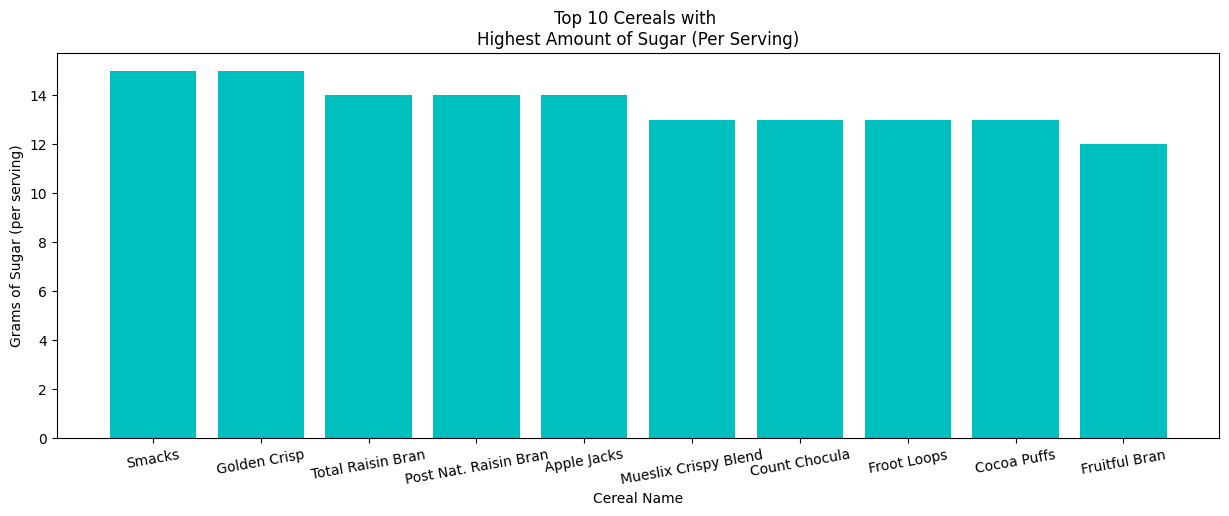

In [171]:
# MATPLOTLIB - Plot Bar Chart

# Size
plt.figure(figsize=(15, 5))

# Bar chart    x axis            y axis
plt.bar(sugary['name'], sugary['sugars'], color= 'c');
#you can use matplotlib colors or a hex color
#example colors: 'b', 'teal', '#20BEFF
#add a semicolon to get rid of the message that comes with the bar

#title
plt.title(f'Top 10 Cereals with \nHighest Amount of Sugar (Per Serving)')

#rotate text
plt.xticks(rotation = 10)

#Axis labels
plt.xlabel('Cereal Name')
plt.ylabel('Grams of Sugar (per serving)');

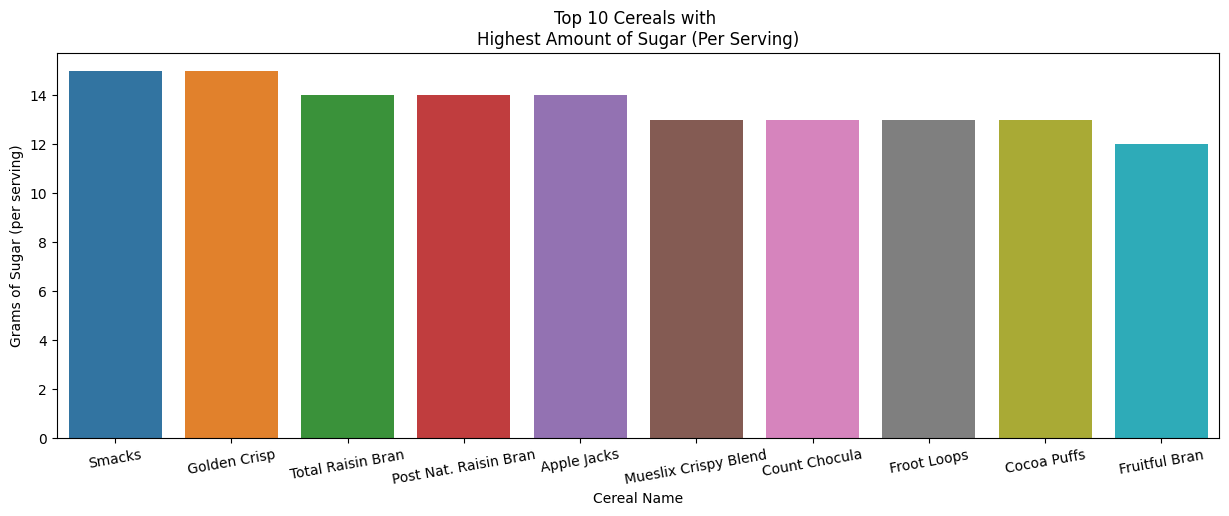

In [173]:
# SEABORN - Plot Bar Chart

#size
plt.figure(figsize=(15,5))

# Bar chart
sns.barplot(x = sugary['name'], y = sugary['sugars'], hue = sugary['name'], legend=False);

#title
plt.title(f'Top 10 Cereals with \nHighest Amount of Sugar (Per Serving)')

#rotate text
plt.xticks(rotation = 10)

#Axis labels
plt.xlabel('Cereal Name')
plt.ylabel('Grams of Sugar (per serving)');

In [112]:
sugary['name'] #Series
sugary['name'][::-1] #index to reverse the series

28            Fruitful Bran
14              Cocoa Puffs
24              Froot Loops
18            Count Chocula
46     Mueslix Crispy Blend
6               Apple Jacks
52    Post Nat. Raisin Bran
70        Total Raisin Bran
30             Golden Crisp
66                   Smacks
Name: name, dtype: object

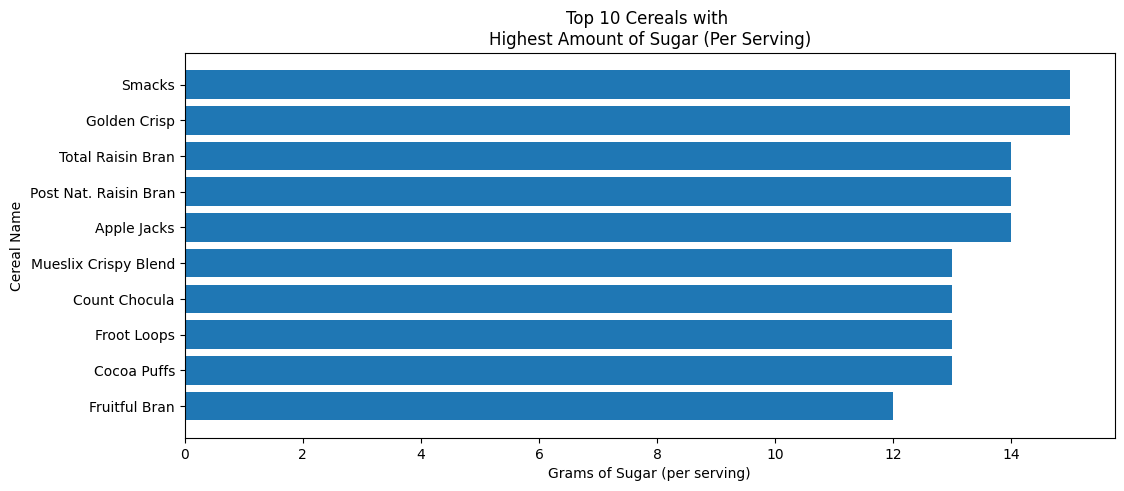

In [113]:
# MATPLOTLIB - Plot Horizontal Bar Chart
#plt.barh() will create a horizontal bar chart. (Note the h at the end of bar!)

# Size
plt.figure(figsize= (12, 5))

# plt.barh()    y axis          x axis
plt.barh(y = sugary['name'][::-1], width= sugary['sugars'][::-1]);

# Create a descriptive title
plt.title(f'Top 10 Cereals with \nHighest Amount of Sugar (Per Serving)')

#Axis labels
plt.ylabel('Cereal Name')
plt.xlabel('Grams of Sugar (per serving)');
# Add axis labels


Text(0, 0.5, 'Brand Name')

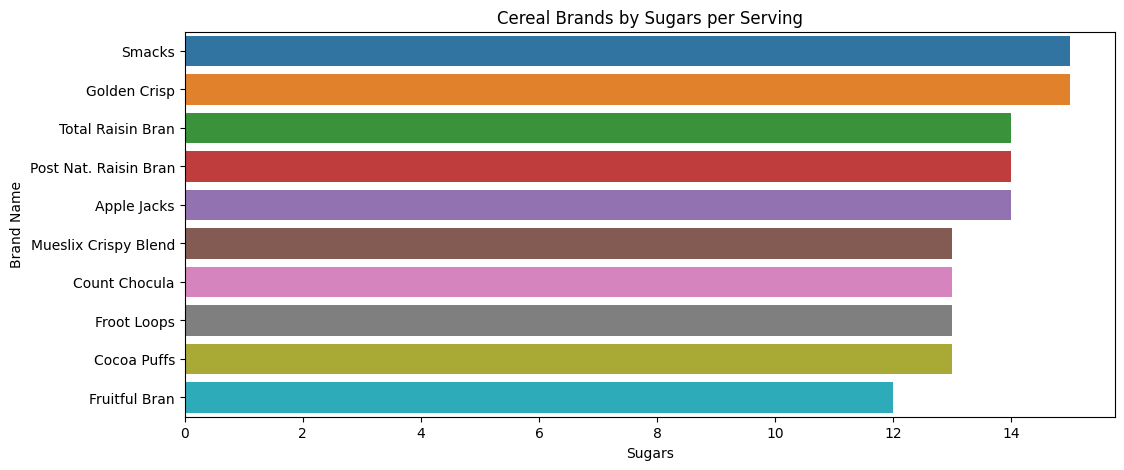

In [175]:
# SEABORN - Plot Horizontal Bar Chart

#size
plt.figure(figsize= (12,5))

#horizontal barchart
sns.barplot(y = sugary['name'], x=sugary['sugars'], orient = 'h', hue=sugary['name'], legend=False);

plt.title('Cereal Brands by Sugars per Serving')
plt.xlabel('Sugars')
plt.ylabel('Brand Name')


## Histograms
> Histograms are used to display the distribution of numerical data.

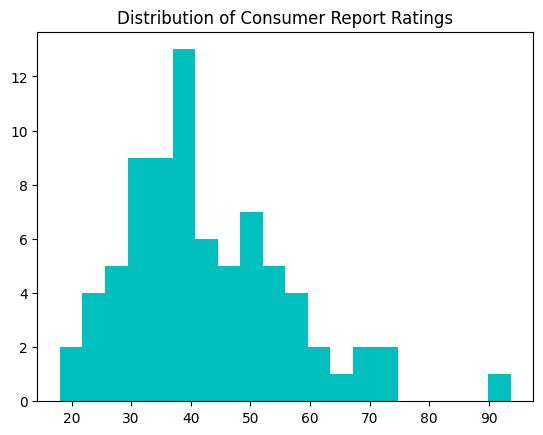

In [115]:
# MATPLOTLIB - Plot a histogram of cereal rating

# Plot it
plt.hist(cereal['rating'], color='c', bins=20)

# Create a descriptive title
plt.title('Distribution of Consumer Report Ratings');

Text(0.5, 1.0, 'Distribution of Consumer Report Ratings')

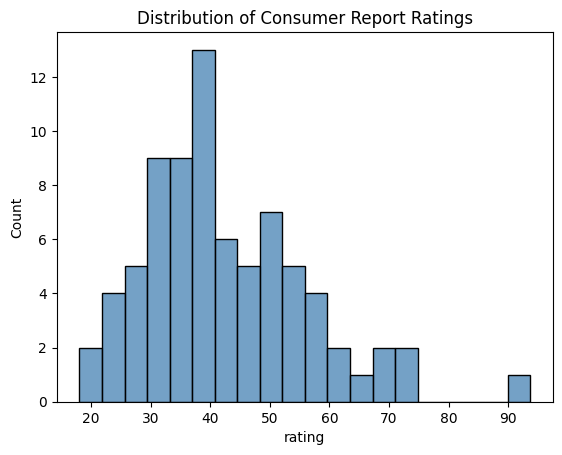

In [179]:
# SEABORN - Plot a histogram of cereal rating

sns.histplot(cereal['rating'], color= 'steelblue', bins=20)

plt.title('Distribution of Consumer Report Ratings')


## Boxplots
> Boxplot are used to display the distribution of numerical data.

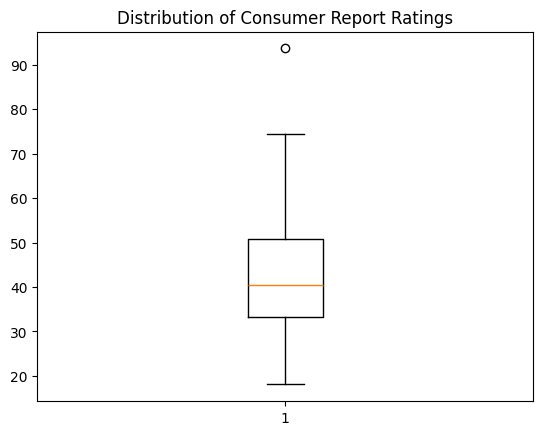

In [117]:
# MATPLOTLIB - Plot a boxplot of cereal rating

# Plot it
plt.boxplot(cereal['rating'])
# Create a descriptive title
plt.title('Distribution of Consumer Report Ratings');

#the orange line is the median, below line is 25%, above is 75%, ends are min and max, circle is an outlier


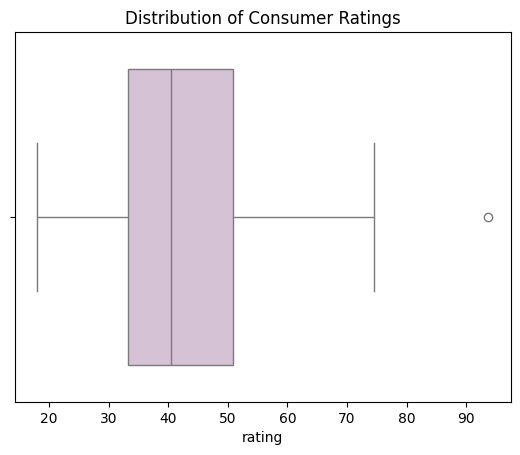

In [118]:
# SEABORN - Plot a boxplot of cereal rating
sns.boxplot(x = cereal['rating'], color='thistle')

plt.title('Distribution of Consumer Ratings');


In [119]:
#BONUS - What cereal has that super high rating?!
cereal[cereal['rating'] > 90] #dataframe[subdata['column']]


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.5,93.704912


In [120]:
cereal[cereal['sugars'] > 12].reset_index()

,index,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
1,14,Cocoa Puffs,G,C,110,1,1,180,0.0,12.0,13,55,25,2,1.00,1.00,22.736446
2,18,Count Chocula,G,C,110,1,1,180,0.0,12.0,13,65,25,2,1.00,1.00,22.396513
3,24,Froot Loops,K,C,110,2,1,125,1.0,11.0,13,30,25,2,1.00,1.00,32.207582
4,30,Golden Crisp,P,C,100,2,0,45,0.0,11.0,15,40,25,1,1.00,0.88,35.252444
5,46,Mueslix Crispy Blend,K,C,160,3,2,150,3.0,17.0,13,160,25,3,1.50,0.67,30.313351
6,52,Post Nat. Raisin Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594
7,66,Smacks,K,C,110,2,1,70,1.0,9.0,15,40,25,2,1.00,0.75,31.230054
8,70,Total Raisin Bran,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.50,1.00,28.592785


## Scatter Plots
> Scatter plots are used to display the relationship between two variables.

In [121]:
cereal['type'].value_counts(normalize= True) #normalize = true gives us percentatges

type
C    0.961039
H    0.038961
Name: proportion, dtype: float64

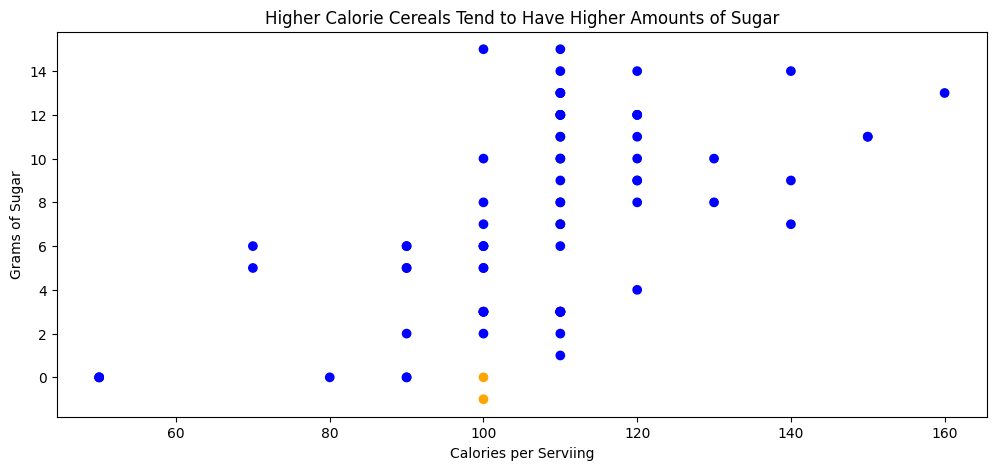

In [183]:
# MATPLOTLIB - Create a scatter plot of calories vs. sugar

    
# Size
plt.figure(figsize = (12, 5))

#dictionary of colors by type of cereal
colors = {'C': 'blue','H': 'orange'}

# Plot it

plt.scatter(x = cereal['calories'], y = cereal['sugars'], color = cereal['type'].map(colors))

# Create a descriptive title
plt.title(f'Higher Calorie Cereals Tend to Have Higher Amounts of Sugar')

# Add axis labels
plt.xlabel('Calories per Serviing')
plt.ylabel('Grams of Sugar');


Text(0, 0.5, 'Sugars')

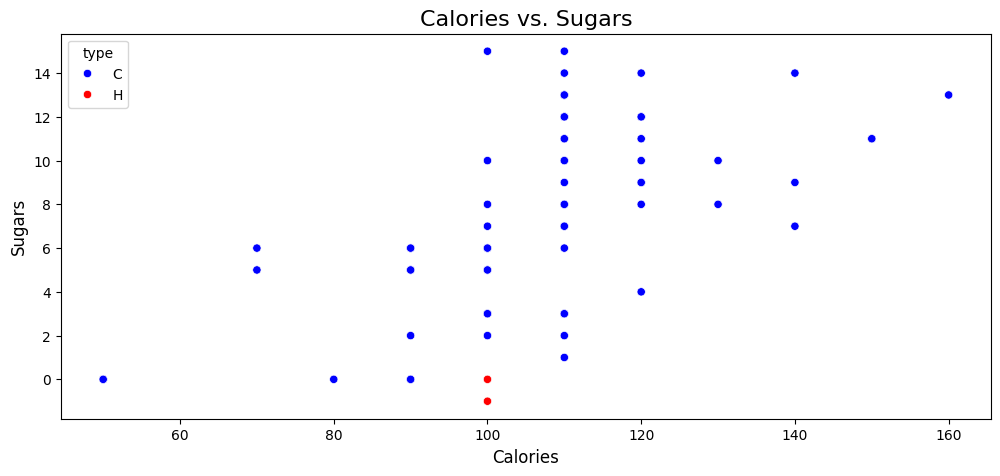

In [182]:
# SEABORN - Create a scatter plot of calories vs. sugar
plt.figure(figsize= (12, 5))

sns.scatterplot(x = cereal['calories'], 
                y= cereal['sugars'], 
                hue= cereal['type'], 
                palette= ['b', 'r']);

plt.title('Calories vs. Sugars', fontsize = 16)

plt.xlabel('Calories', fontsize = '12')
plt.ylabel('Sugars', fontsize='12')


## Line Graphs
> Line graphs (also known as line plots or line charts) use lines to connect data points to show the changes in numerical values over time.

In [132]:
# Generate data over time

# Generate dates
dates = pd.date_range('3-1-22', '7-30-22')

In [133]:
dates #created an array of all the dates in a range

DatetimeIndex(['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10',
               ...
               '2022-07-21', '2022-07-22', '2022-07-23', '2022-07-24',
               '2022-07-25', '2022-07-26', '2022-07-27', '2022-07-28',
               '2022-07-29', '2022-07-30'],
              dtype='datetime64[ns]', length=152, freq='D')

In [134]:
# Generate bowls eaten
bowls_eaten = np.random.poisson(1, size = 152)

In [135]:
bowls_eaten 

array([2, 2, 1, 2, 1, 0, 0, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 3, 2, 1, 1, 2, 3, 1, 0, 1, 1, 1, 2, 0, 1,
       2, 1, 0, 1, 3, 1, 4, 1, 0, 1, 0, 1, 2, 1, 4, 0, 0, 0, 1, 3, 1, 2,
       0, 1, 1, 1, 1, 1, 3, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       3, 3, 0, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 2, 2, 3, 0, 0, 0, 0,
       1, 0, 1, 4, 1, 2, 1, 1, 2, 1, 1, 2, 0, 3, 0, 0, 3, 0, 1, 1])

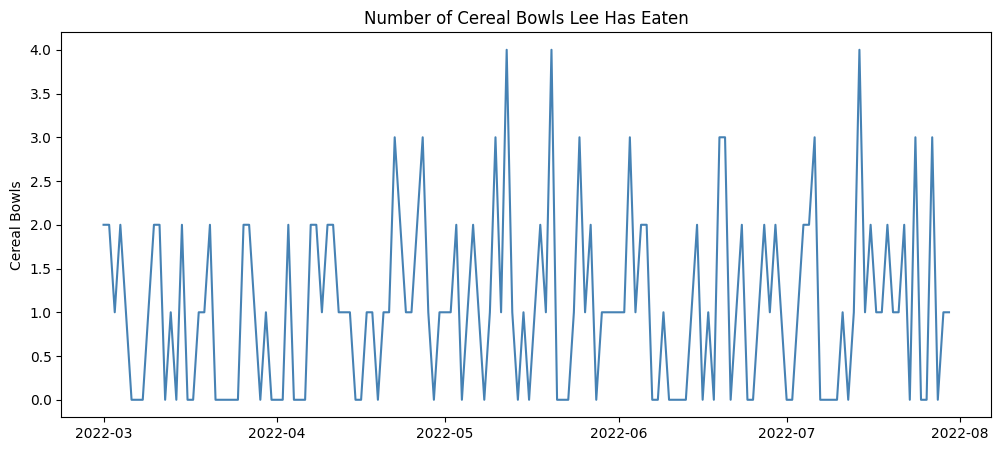

In [141]:
# MATPLOTLIB - Create a line plot of the number of bowls of cereal I've consumed

# Size
plt.figure(figsize= (12,5))

# Plot it 
plt.plot(dates, bowls_eaten, color = 'steelblue')
# Create a descriptive title
plt.title("Number of Cereal Bowls Lee Has Eaten")
# Add axis labels
plt.ylabel('Cereal Bowls');

Text(0, 0.5, 'Bowls Eaten')

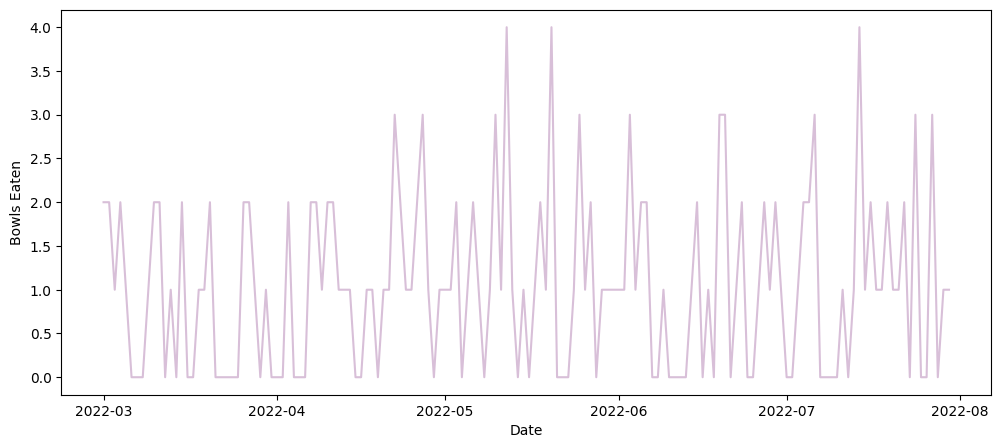

In [143]:
# SEABORN - Create a line plot of the number of bowls of cereal I've consumed

plt.figure(figsize= (12,5))

sns.lineplot(x = dates, y = bowls_eaten, color = 'thistle');

plt.xlabel('Date')
plt.ylabel('Bowls Eaten')


## Heat Maps
> Heat maps use color to show the strength of a relationship between two or more variables.

A commonly seen implementation of a heatmap uses the [Seaborn library](https://seaborn.pydata.org).

In [145]:
cereal.corr(numeric_only=True)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


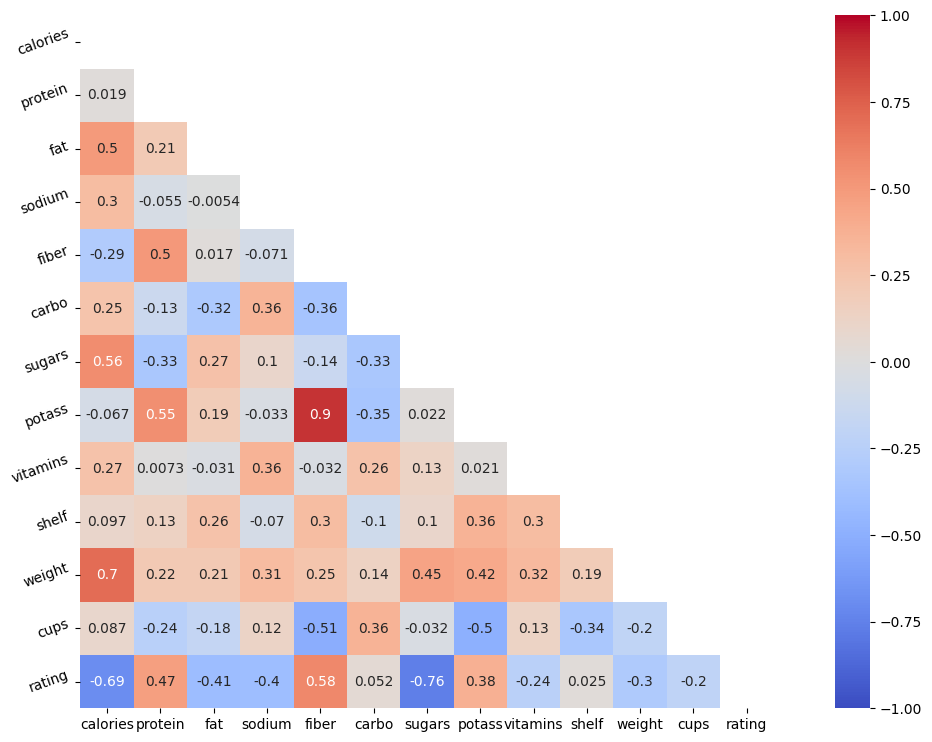

In [153]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize= (16, 9))

# Get correlation of variables.
corr = cereal.corr(numeric_only=True)

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr) #You need numpy to do this, make your values equal to zero
mask[np.triu_indices_from(mask)] = True #makes the upper triangle = to 1, and then puts a mask over the 1's

# Plot our correlation heatmap
sns.heatmap(corr,
            square= True,
            cmap= 'coolwarm',
            annot= True, #this is how to get the numbers inside
            vmax= 1, #this makes our max and min be on the same scale to fix color scaling
            vmin= -1, 
            mask = mask)

plt.yticks(rotation = 20);


In [157]:
cereal.corr(numeric_only=True)[['rating']].sort_values('rating', ascending=False)

,rating
rating,1.000000
fiber,0.584160
protein,0.470618
potass,0.380165
carbo,0.052055
shelf,0.025159
cups,-0.203160
vitamins,-0.240544
weight,-0.298124
sodium,-0.401295


<Axes: >

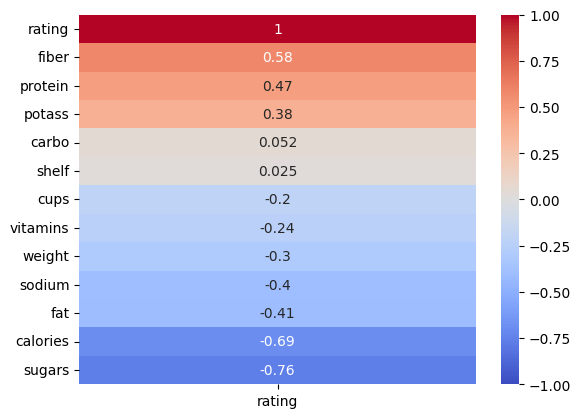

In [161]:
# Let's look at the correlations to rating
sns.heatmap(cereal.corr(numeric_only=True)[['rating']].sort_values('rating', ascending=False),
            annot = True,
            vmax = 1,
            vmin = -1,
            cmap = 'coolwarm')

Correlation refers to a statistical relationship between two variables. When two variables are correlated, changes in one variable are associated with changes in the other variable. A correlation can be positive (meaning that the two variables move in the same direction) or negative (meaning that the two variables move in opposite directions). However, correlation does not imply causation.

Correlation can be a useful tool to identify potential relationships between variables, but it is not sufficient to establish causation.

[Spurious Correlations](https://www.tylervigen.com/spurious-correlations)

## Advanced: Subplots
> We can use subplots to easily compare multiple visualizations by sharing an axis.

In [162]:
stocks = pd.read_csv('data/food-stocks.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.head()

,Date,DPZ,MCD,WEN,YUM
0,2020-04-13,355.140015,180.119995,16.570000,77.059998
1,2020-04-14,358.260010,183.990005,17.170000,79.889999
2,2020-04-15,354.619995,177.839996,16.740000,77.639999
3,2020-04-16,360.470001,179.500000,17.280001,80.110001
4,2020-04-17,362.970001,186.100006,18.400000,84.169998


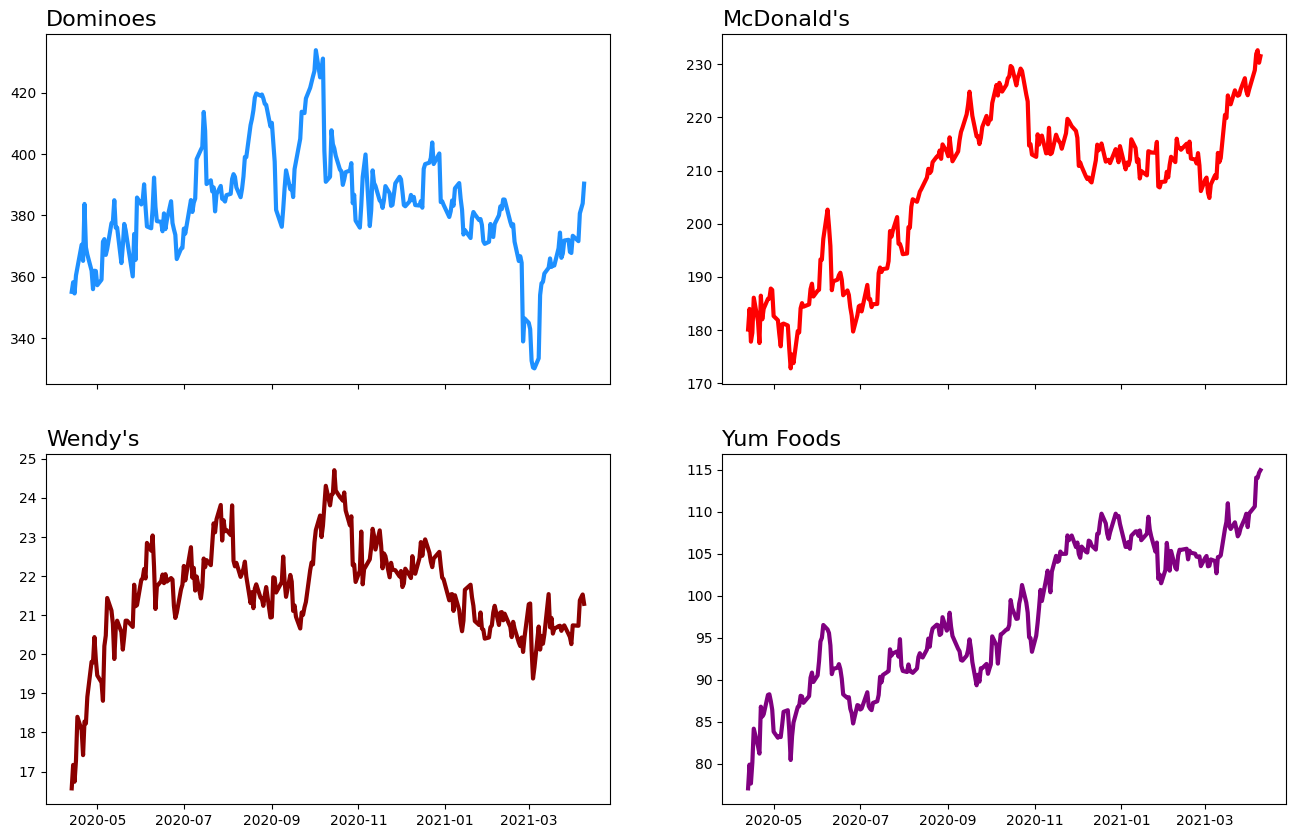

In [163]:
# Create the figure and list of axes.
# We can also set the figsize here.
# Additionally, set sharex=True to keep x-axes aligned
fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

# First determine an axis to operatoe on and then create the plot!              This is indexing the rows and columns
axs[0][0].plot(stocks['Date'], stocks['DPZ'], color='dodgerblue', linewidth=3) #the [0][0] is the first row, first column
axs[0][0].set_title('Dominoes', size=16, loc='left') #the [0][0] is the first row, first column

# We can do this for all the other stocks!
axs[0][1].plot(stocks['Date'], stocks['MCD'], color='red', linewidth=3) #the [0][1] is the first row, second column
axs[0][1].set_title('McDonald\'s', size=16, loc='left') #the [0][1] is the first row, second column

axs[1][0].plot(stocks['Date'], stocks['WEN'], color='darkred', linewidth=3) #the [1][0] is the second row, first column
axs[1][0].set_title('Wendy\'s', size=16, loc='left') #the [1][0] is the second row, first column

axs[1][1].plot(stocks['Date'], stocks['YUM'], color='purple', linewidth=3) #the [1][1] is the second row, second column
axs[1][1].set_title('Yum Foods', size=16, loc='left'); #the [1][1] is the second row, second column

---

## More Visualization Libraries in Python

In this lesson, you saw the vanilla matplotlib API and [Seaborn](https://seaborn.pydata.org/) (which uses Matplotlib under the hood). Other Popular Python visualization libraries include the following, which can be used for more advanced plots (like maps) or for interactive plotting:
- [Bokeh](http://bokeh.pydata.org/en/latest/)
- [Altair](https://altair-viz.github.io/)
- [Plotly](https://plot.ly/python/getting-started/)

## Other Visualization Tools

A variety of non-programming tools are also used in industry. However, not all of these are great for repeated analysis, customizable, or free! For example:
- Excel
- Power BI
- Tableau

---

## Matplotlib gallery

See the possibilities of matplotlib [here](https://matplotlib.org/3.2.1/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py).
- These examples are to show what's possible. Don't feel you need to memorize any of them. 

---

## Choosing the Right Chart Type

**If-This-Then-That Guidelines**

### Just a number or two
If showing just one or two numbers, then:
   - simply report the numbers.
   - compare numbers using a bar chart.
   
### One Variable
If visualizing the distribution of one variable, then:
   - If the variable is qualitative, (categorical: nominal or ordinal): use a bar chart.
   - If the variable is quantitative (numeric: ratio or interval): use a histogram.
    
### Two Variables
If visualizing the relationship between two variables, then:
   - If both variables are quantitative, then:
       - If one variable is time, then use a line plot.
       - Otherwise, use a scatter plot - or a box plot if want to show stats.
   - If one variable is quantitative and another is qualitative, then use multiple histograms.
   - If both variables are qualitative, then:
       - Use a table or a heat map.

### Three+ Variables
- Use a heat map, box plot, or multiple scatter plots

That should cover 95%+ of cases you'll see. 😀


### Avoid...
- Pie Charts
- 3-D Charts